# Understanding Emissions

### Totals emissions table has several aggregated emissions columns.
### The idea is to try to identify which ones compose the totals.

In [5]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [6]:
data = pd.read_parquet(r'../data/FAOSTAT/clean_data/all_tables_processed/full_country_dataset_v2_imputed.parquet')

In [7]:
world = data[data['Area Code'] == 5000]
emissions_cols = [col for col in world.columns if 'co2' in col.lower()]
world = world[emissions_cols+['Area', 'Year']]
world.head()

,Agricultural_Soils_Emissions_(CO2eq)_(AR5)_kt,Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt,Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt,Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt,Crop_Residues_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt,Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt,Emissions_on_agricultural_land_Emissions_(CO2eq)_(AR5)_kt,Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt,Farm_gate_Emissions_(CO2eq)_(AR5)_kt,...,Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt,Net_Forest_conversion_Emissions_(CO2eq)_(AR5)_kt,Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt,Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt,Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt,Savanna_fires_Emissions_(CO2eq)_(AR5)_kt,Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt,Waste_Emissions_(CO2eq)_(AR5)_kt,Area,Year
7776,2.224143e+06,9.655259e+05,1.420960e+07,41367.5067,218263.7023,782003.5257,3.594373e+06,1.150055e+07,3.605310e+06,6.825791e+06,...,566816.4235,4.854423e+06,50653.2765,2.709052e+06,656261.4538,287155.4909,541383.6463,1.619973e+06,World,1990
7777,1.917559e+06,9.877684e+05,1.428984e+07,38628.3316,200071.8700,761825.8643,3.596599e+06,1.150059e+07,3.422780e+06,6.825831e+06,...,578365.5475,4.952209e+06,49842.5865,2.789253e+06,653932.1787,281501.4027,524788.1610,1.649017e+06,World,1991
7778,2.072380e+06,1.004953e+06,1.427809e+07,39388.0480,238392.9809,782189.2744,3.576217e+06,1.135634e+07,3.631193e+06,6.681581e+06,...,585885.1610,4.908834e+06,52719.7048,2.921753e+06,659836.6215,278199.4988,540532.7044,1.671899e+06,World,1992
7779,2.084081e+06,1.022929e+06,1.427699e+07,38308.7955,242199.5805,775191.7371,3.562762e+06,1.130564e+07,3.627881e+06,6.630884e+06,...,585940.6785,4.839817e+06,52921.9133,2.971348e+06,656726.1401,280220.3784,526357.2620,1.694048e+06,World,1993
7780,2.442677e+06,1.032877e+06,1.439022e+07,59458.1461,237775.0234,784024.4621,3.594485e+06,1.137659e+07,4.311138e+06,6.701834e+06,...,595420.4970,4.953919e+06,55684.7246,3.013624e+06,661524.8341,280104.4106,528098.5179,1.719603e+06,World,1994


In [8]:
# These are the totals columns
new_totals = [
    'Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt',
    'Farm_gate_Emissions_(CO2eq)_(AR5)_kt',
    'Land_Use_change_Emissions_(CO2eq)_(AR5)_kt',
    'Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt',
]

world_2020 = data[(data['Year'] == 2020) & (data['Area Code'] == 5000)]

for col in new_totals:
    print(col)
    print(world_2020[col].sum()/1e6)
    print()

Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt
16.0362636811

Farm_gate_Emissions_(CO2eq)_(AR5)_kt
7.755712251199999

Land_Use_change_Emissions_(CO2eq)_(AR5)_kt
3.1511530507

Pre-_and_Post-_Production_Emissions_(CO2eq)_(AR5)_kt
5.1293983792



## CROPS related columns

In [10]:
for col in world_2020.columns:
    if "rice" in col.lower() or "crop" in col.lower() or "fert" in col.lower() or "farm" in col.lower():
        print(col)
        print(world_2020[col].sum()/1e6)
        print()

Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt
0.0393453434

Crop_Residues_Emissions_(CO2eq)_(AR5)_kt
0.3054566547

Emissions_from_crops_Emissions_(CO2eq)_(AR5)_kt
0.9114756098

Farm_gate_Emissions_(CO2eq)_(AR5)_kt
7.755712251199999

Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt
0.44644641129999996

Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt
0.7180044068

Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt
0.7527758282999999



In [11]:
crops_partials = [
    'Crop_Residues_Emissions_(CO2eq)_(AR5)_kt',
    'Burning_-_Crop_residues_Emissions_(CO2eq)_(AR5)_kt',
    'Rice_Cultivation_Emissions_(CO2eq)_(AR5)_kt',
    'Synthetic_Fertilizers_Emissions_(CO2eq)_(AR5)_kt',
]

print(f"Total 2020: {world_2020[crops_partials].sum().sum()/1e6}")
print(f"Total all years: {world[crops_partials].sum().sum()/1e6}")

Total 2020: 1.8155822332
Total all years: 52.4346961201


# LIVESTOCK related columns

In [12]:
for col in world_2020.columns:
    if "manure" in col.lower() or "enter" in col.lower() or "lives" in col.lower():
        print(col)
        print(world_2020[col].sum()/1e6)
        print()

Emissions_from_livestock_Emissions_(CO2eq)_(AR5)_kt
4.1723563835999995

Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt
3.4970900037

Manure_Management_Emissions_(CO2eq)_(AR5)_kt
0.5973613552

Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt
0.2067088966

Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt
0.7723088185000001



In [13]:
livestock_partials = [
        "Enteric_Fermentation_Emissions_(CO2eq)_(AR5)_kt",
        "Manure_Management_Emissions_(CO2eq)_(AR5)_kt",
        "Manure_applied_to_Soils_Emissions_(CO2eq)_(AR5)_kt",
        "Manure_left_on_Pasture_Emissions_(CO2eq)_(AR5)_kt"
]

In [14]:
print(f"Total 2020: {world_2020[livestock_partials].sum().sum()/1e6}")
print(f"Total all years: {world[livestock_partials].sum().sum()/1e6}")

Total 2020: 5.073469074
Total all years: 165.45436238300002


# Land Use

In [15]:
for col in world_2020.columns:
    if "forest" in col.lower() or "drain" in col.lower() or "fire" in col.lower():
        print(col)
        print(world_2020[col].sum()/1e6)
        print()

Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt
0.15845222690000002

Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt
0.0476482572

Forest_fires_Emissions_(CO2eq)_(AR5)_kt
0.245896652

Forestland_Emissions_(CO2eq)_(AR5)_kt
-4.8738658451

Net_Forest_conversion_Emissions_(CO2eq)_(AR5)_kt
3.0931468799

Savanna_fires_Emissions_(CO2eq)_(AR5)_kt
0.22098728909999998



In [17]:
land_partials = [
    'Net_Forest_conversion_Emissions_(CO2eq)_(AR5)_kt',
    'Fires_in_humid_tropical_forests_Emissions_(CO2eq)_(AR5)_kt',
    'Fires_in_organic_soils_Emissions_(CO2eq)_(AR5)_kt',
    'Forest_fires_Emissions_(CO2eq)_(AR5)_kt',
    'Savanna_fires_Emissions_(CO2eq)_(AR5)_kt',
]

print(f"Total 2020: {world_2020[land_partials].sum().sum()/1e6}")
print(f"Total all years: {world[land_partials].sum().sum()/1e6}")

Total 2020: 3.7661313051
Total all years: 184.0146128531


# POST-PRODUCTION

In [18]:
for col in world_2020.columns:
    if "food" in col.lower() or "house" in col.lower() or "manuf" in col.lower():
        print(col)
        print(world_2020[col].sum()/1e6)
        print()

Agrifood_Systems_Waste_Disposal_Emissions_(CO2eq)_(AR5)_kt
1.2796726039

Agrifood_systems_Emissions_(CO2eq)_(AR5)_kt
16.0362636811

Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt
0.44644641129999996

Food_Household_Consumption_Emissions_(CO2eq)_(AR5)_kt
1.1916244716

Food_Packaging_Emissions_(CO2eq)_(AR5)_kt
0.30360888319999996

Food_Processing_Emissions_(CO2eq)_(AR5)_kt
0.6247293143

Food_Retail_Emissions_(CO2eq)_(AR5)_kt
0.7177594052

Food_Transport_Emissions_(CO2eq)_(AR5)_kt
0.5142038964000001

Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt
0.0513533932



In [20]:
post_partials = [
    'Fertilizers_Manufacturing_Emissions_(CO2eq)_(AR5)_kt',
    'Pesticides_Manufacturing_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Packaging_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Processing_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Retail_Emissions_(CO2eq)_(AR5)_kt',
    'Food_Transport_Emissions_(CO2eq)_(AR5)_kt',
]

print(f"Total 2020: {world_2020[post_partials].sum().sum()/1e6}")
print(f"Total all years: {world[post_partials].sum().sum()/1e6}")

Total 2020: 2.6581013035999996
Total all years: 66.9575242666


# SUM PARTIALS IN FULL DATA

In [21]:
selected_columns = ['Area', 'Year', 'Area Code', 'Population_-_Est._&_Proj._Total_Population_-_Both_sexes_1000_No'] + crops_partials + livestock_partials + land_partials + post_partials

data = data[selected_columns]

In [22]:
# Initialize empty total columns

total_colums = [
    'TOTAL_CROPS_EMISSIONS_(CO2eq)_kt',
    'TOTAL_LIVESTOCK_EMISSIONS_(CO2eq)_kt',
    'TOTAL_LAND_USE_EMISSIONS_(CO2eq)_kt',
    'TOTAL_POST_PROCESSING_EMISSIONS_(CO2eq)_kt'
]

In [23]:
def create_total_emissions(df, total_column, partial_columns):
    df[total_column] = df.groupby(['Area', 'Area Code', 'Year'])[partial_columns].transform('sum').sum(axis=1)

In [24]:
create_total_emissions(data, 'TOTAL_CROPS_EMISSIONS_(CO2eq)_kt', crops_partials)
create_total_emissions(data, 'TOTAL_LIVESTOCK_EMISSIONS_(CO2eq)_kt', livestock_partials)
create_total_emissions(data, 'TOTAL_LAND_USE_EMISSIONS_(CO2eq)_kt', land_partials)
create_total_emissions(data, 'TOTAL_POST_PROCESSING_EMISSIONS_(CO2eq)_kt', post_partials)

# Create a TOTAL TOTAL emissions column

create_total_emissions(data, 'TOTAL_TOTAL_EMISSIONS_(CO2eq)_kt', total_colums)

In [25]:
world = data[data['Area Code'] == 5000]
world_totals = world[total_colums+['Area', 'Year']]

<Axes: title={'center': 'World Total Emissions 2020'}>

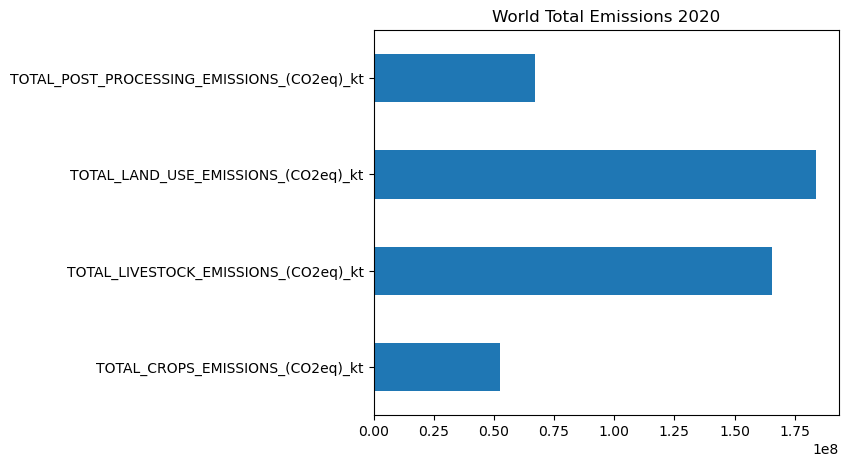

In [28]:
world_totals[total_colums].sum().plot(kind='barh', figsize=(6, 5), title="World Total Emissions 2020")

<Axes: title={'center': 'World Total Emissions as Percentage 2020'}>

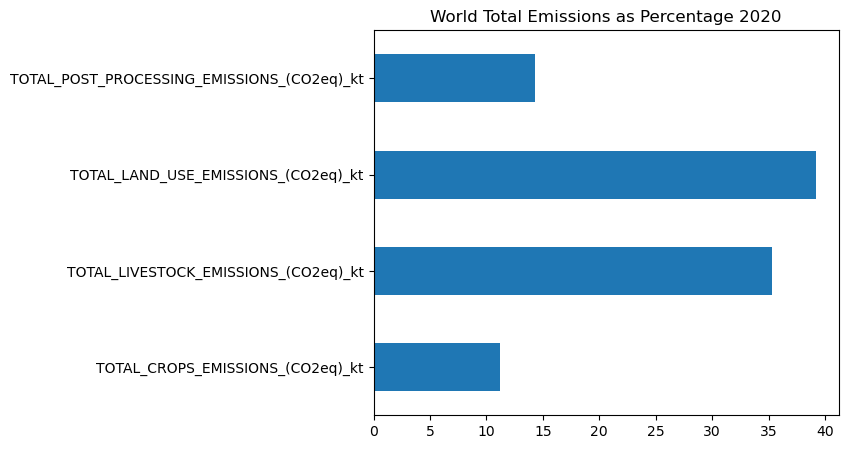

In [29]:
(world_totals[total_colums].sum() / world_totals[total_colums].sum().sum() * 100).plot(kind='barh', figsize=(6, 5), title="World Total Emissions as Percentage 2020")